In [1]:
# Dependencies
import random
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
# API source
from config import weather_api_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Add the latitudes and longitudes to a list.
#lat_lngs = zip(*lat_lngs)
#coordinates = list(lat_lngs)
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    print(lat_lng[0],lat_lng[1])
    break

52.70182331537012 -45.530609575373944


In [5]:
# Create list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # Filter out dupes
    if city not in cities:
        cities.append(city)
# confirmation
print(len(cities))

622


In [6]:
# URL for Weahter Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844


In [7]:
query_url = url + "appid" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c777755f1537ae28f437f017b5d96844&q=Boston


In [9]:
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 87.4,
  'feels_like': 84.36,
  'temp_min': 84,
  'temp_max': 90,
  'pressure': 1007,
  'humidity': 48},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1592942763,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
boston_data = city_weather.json()

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 87.4,
  'feels_like': 84.36,
  'temp_min': 84,
  'temp_max': 90,
  'pressure': 1007,
  'humidity': 48},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 190},
 'clouds': {'all': 75},
 'dt': 1592942763,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592903286,
  'sunset': 1592958295},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 90 48 75 14.99


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-23 20:06:03'

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | llanes
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | zhezkazgan
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | nizhneudinsk
Processing Record 14 of Set 1 | girne
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | santo antonio do ica
Processing Record 19 of Set 1 | stornoway
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | lago

City not found. Skipping...
Processing Record 39 of Set 4 | katherine
Processing Record 40 of Set 4 | maceio
Processing Record 41 of Set 4 | halifax
Processing Record 42 of Set 4 | san rafael
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | severnoye
Processing Record 46 of Set 4 | songea
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | filingue
Processing Record 49 of Set 4 | estelle
Processing Record 50 of Set 4 | mae ramat
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | luebo
Processing Record 5 of Set 5 | gweta
Processing Record 6 of Set 5 | novozavidovskiy
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | ngunguru
Processing Record 9 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 5 | belushya guba
City not 

City not found. Skipping...
Processing Record 31 of Set 8 | walvis bay
Processing Record 32 of Set 8 | svetlaya
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | tatawin
Processing Record 35 of Set 8 | kaseda
Processing Record 36 of Set 8 | ketchikan
Processing Record 37 of Set 8 | puerto colombia
Processing Record 38 of Set 8 | valparaiso
Processing Record 39 of Set 8 | toliary
City not found. Skipping...
Processing Record 40 of Set 8 | baghdad
Processing Record 41 of Set 8 | seguin
Processing Record 42 of Set 8 | mirnyy
Processing Record 43 of Set 8 | yialos
City not found. Skipping...
Processing Record 44 of Set 8 | logan
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | mpanda
Processing Record 47 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 48 of Set 8 | freeport
Processing Record 49 of Set 8 | khingansk
Processing Record 50 of Set 8 | korla
Processing Record 1 of Set 9 | xining
Processing Record 2 of Set 9 | vestby

Processing Record 15 of Set 12 | chicama
Processing Record 16 of Set 12 | severo-yeniseyskiy
Processing Record 17 of Set 12 | senanga
Processing Record 18 of Set 12 | bhinga
Processing Record 19 of Set 12 | bowen
Processing Record 20 of Set 12 | puerto baquerizo moreno
Processing Record 21 of Set 12 | burica
City not found. Skipping...
Processing Record 22 of Set 12 | bitung
Processing Record 23 of Set 12 | homer
Processing Record 24 of Set 12 | ciudad guayana
Processing Record 25 of Set 12 | sechura
Processing Record 26 of Set 12 | geraldton
Processing Record 27 of Set 12 | keerbergen
Processing Record 28 of Set 12 | mananara
Processing Record 29 of Set 12 | turayf
Processing Record 30 of Set 12 | bogorodskoye
Processing Record 31 of Set 12 | qaqortoq
Processing Record 32 of Set 12 | iguatemi
Processing Record 33 of Set 12 | ishigaki
Processing Record 34 of Set 12 | upernavik
Processing Record 35 of Set 12 | sug-aksy
City not found. Skipping...
Processing Record 36 of Set 12 | phan ra

In [17]:
len(city_data)

560

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.16,51,100,9.15,PF,2020-06-23 20:08:12
1,Hobart,-42.88,147.33,53.01,93,90,9.17,AU,2020-06-23 20:05:33
2,Tasiilaq,65.61,-37.64,48.20,66,75,17.22,GL,2020-06-23 20:08:12
3,Llanes,43.42,-4.75,75.99,80,0,1.99,ES,2020-06-23 20:08:12
4,New Norfolk,-42.78,147.06,53.01,90,100,2.51,AU,2020-06-23 20:08:12


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Compile fields for dataframe to plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592942942.55932

# WeatherPy Charts

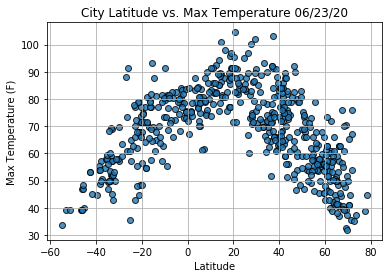

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

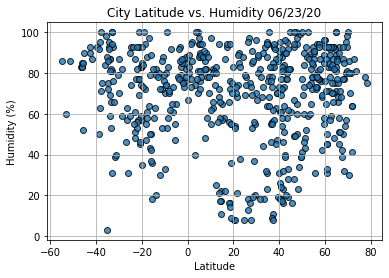

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

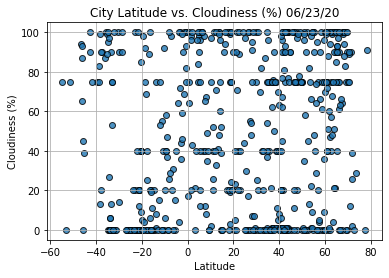

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

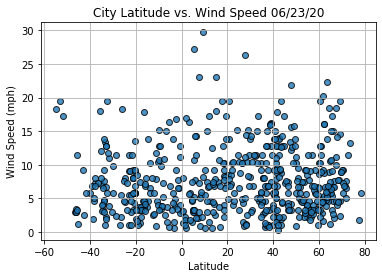

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression with SciPy

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

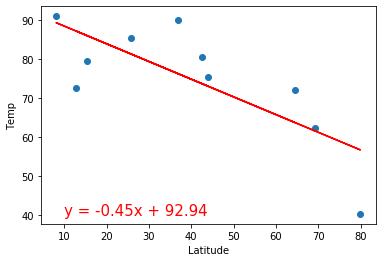

In [30]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

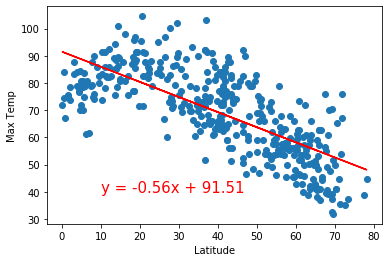

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

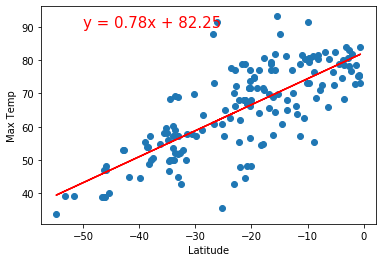

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

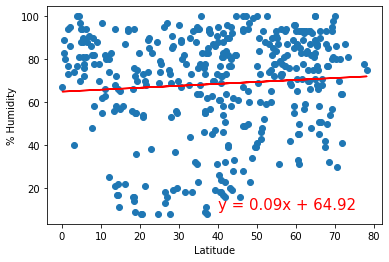

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

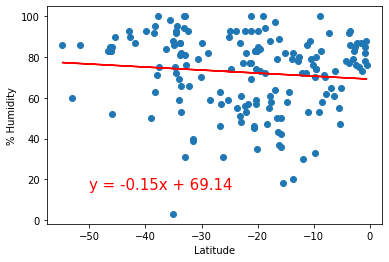

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

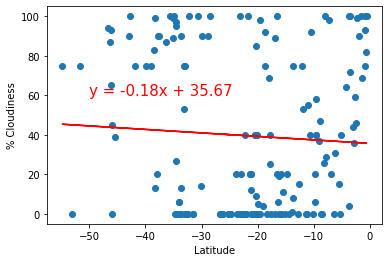

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

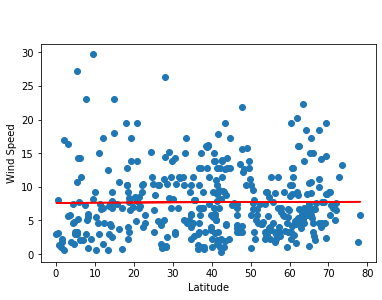

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

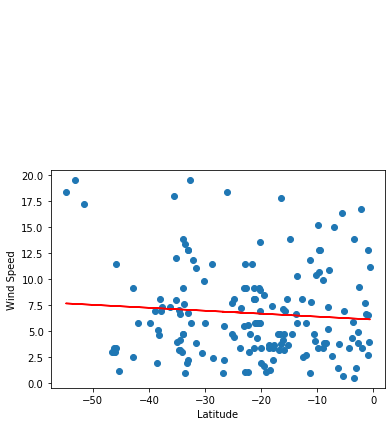

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

# GMaps Visualization with API

In [40]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [41]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Rikitea,-23.12,-134.97,70.16,51,100,9.15,PF,2020-06-23 20:08:12
1,1,Hobart,-42.88,147.33,53.01,93,90,9.17,AU,2020-06-23 20:05:33
2,2,Tasiilaq,65.61,-37.64,48.20,66,75,17.22,GL,2020-06-23 20:08:12
3,3,Llanes,43.42,-4.75,75.99,80,0,1.99,ES,2020-06-23 20:08:12
4,4,New Norfolk,-42.78,147.06,53.01,90,100,2.51,AU,2020-06-23 20:08:12


In [42]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [45]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [47]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.0)

In [48]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [52]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,3,Llanes,43.42,-4.75,75.99,80,0,1.99,ES,2020-06-23 20:08:12
7,7,Hambantota,6.12,81.12,80.10,81,100,14.36,LK,2020-06-23 20:08:12
8,8,Butaritari,3.07,172.79,83.46,74,21,16.44,KI,2020-06-23 20:08:12
15,15,Kapaa,22.08,-159.32,82.00,74,40,10.29,US,2020-06-23 20:08:13
16,16,Cabo San Lucas,22.89,-109.91,88.00,38,40,5.82,MX,2020-06-23 20:08:13
17,17,Santo Antonio Do Ica,-3.10,-67.94,84.04,79,44,1.45,BR,2020-06-23 20:08:13
24,24,Sao Raimundo Nonato,-9.02,-42.70,81.39,53,37,9.89,BR,2020-06-23 20:08:07
27,27,Padang,-0.95,100.35,75.13,85,100,6.60,ID,2020-06-23 20:08:14
28,28,Atuona,-9.80,-139.03,79.54,70,6,15.19,PF,2020-06-23 20:08:14
31,31,Sinnamary,5.38,-52.95,79.03,89,100,10.67,GF,2020-06-23 20:08:14


In [53]:
preferred_cities_df.count()

City_ID       182
City          182
Lat           182
Lng           182
Max Temp      182
Humidity      182
Cloudiness    182
Wind Speed    182
Country       182
Date          182
dtype: int64

In [54]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Llanes,ES,75.99,43.42,-4.75,
7,Hambantota,LK,80.10,6.12,81.12,
8,Butaritari,KI,83.46,3.07,172.79,
15,Kapaa,US,82.00,22.08,-159.32,
16,Cabo San Lucas,MX,88.00,22.89,-109.91,


In [55]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [56]:
# Dependencies and Setup
import requests
import gmaps

In [57]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

In [58]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [59]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, 
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [62]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))